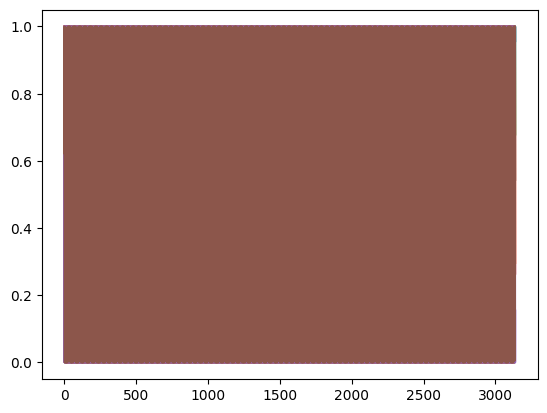

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x = np.arange(0, 1000 * np.pi, 0.1)
length = len(x)//63
x = x[:length*63]

y = np.sin(x)
y2 = np.cos(x)
y3 = y + y2
y4 = np.sin(y2)
y5 = np.cos(y)
y6 = np.tan(y3)
    

data = pd.DataFrame(columns=['sin', 'cos', 'sin_cos', 'scos', 'csin', 'tan'])
data['sin'] = y
data['cos'] = y2
data['sin_cos'] = y3
data['scos'] = y4
data['csin'] = y5
data['tan'] = y6

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
plt.plot(x, data)
plt.show()

In [2]:

# from tsl.datasets.mts_benchmarks import ExchangeBenchmark

# data = ExchangeBenchmark().dataframe().values
def find_period(signal):
    periods = []
    for i in range(len(signal)):
        sing = signal[i]
        acf = np.correlate(sing, sing, 'full')[-len(sing):]
        inflection = np.diff(np.sign(np.diff(acf)))
        peaks = (inflection < 0).nonzero()[0] + 1
        periods.append(peaks[acf[peaks].argmax()])
    return int(np.median(periods))

In [3]:
data = data.reshape(length, 63, 6)

In [4]:
np.save('./Datasets/SyntheticSinDataset', data)
np.save('./Datasets/SyntheticSinScaler', scaler)